In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# DeltaSGD

In [209]:
def DeltaSGD(w2,x,d):
    n = 4
    dwsum = np.array([0,0,0], float)
    for i in range(n):
        alpha = 0.9

        # 입력 데이터
        ind = x[i]

        # 정답
        ans = d[i]

        # 가중치 * 입력값
        v = np.dot(w2,ind)

        # 예측치
        y = sigmoid(v)

        # 오차
        e = ans - y

        # Delta
        delta = y * (1-y) * e

        #Delta_rule
        dw = alpha * delta * ind
        
        # 가중치 힙
        w2 += dw

    return(w2)

In [121]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = [0,0,1,1]

# Weight
w = 2 * np.random.rand(1,3) - 1

for epoch in range(10000):
    w[0] = DeltaSGD(w,x,d)
    
predict = np.array([])

for i in range(4):
    v = np.dot(w,x[i])
    predict = np.append(predict, sigmoid(v))
    
predict

array([0.01019866, 0.0082935 , 0.99324259, 0.99168734])

# DeltaBatch

In [231]:
def DeltaBatch(w1,x,d):
    dwsum = np.array([0,0,0], float)
    n = 4

    for i in range(n):

        # 입력 데이터
        ind = x[i]

        # 정답
        ans = d[i]

        # 가중치 * 입력값
        v = np.dot(w1,ind)

        # 예측치
        y = sigmoid(v)

        # 오차
        e = ans - y

        # Delta
        delta = y * (1-y) * e
        
        
        # 모든 입력 데이터의 가중치 합 구하기
        dw = alpha * delta * x[i]
        
        # 가중치 힙
        dwsum += dw
        
    
    for i in range(len(w1[0])):
        w1[0][i] += dwsum[i]/n    
    

    return(w1)


In [192]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = [0,0,1,1]

# Weight
w = 2 * np.random.rand(1,3) - 1


for epoch in range(10000):
    w[0] = DeltaBatch(w,x,d)
    
predict = np.array([])

for i in range(4):
    v = np.dot(w,x[i])
    predict = np.append(predict, sigmoid(v))
    
predict

array([0.0208393 , 0.01686528, 0.98628459, 0.98303999])

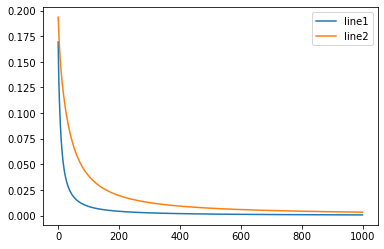

In [273]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = np.array([0,0,1,1])

E1 = np.zeros(1000)
E2 = np.zeros(1000)


# Weight
w1 = 2 * np.random.rand(1,3) - 1
w2 = w1.copy()

for epoch in range(1000):
    w1[0] = DeltaSGD(w1,x,d)
    w2[0] = DeltaBatch(w2,x,d)
    
    
    es1 = 0
    es2 = 0
    n = 4
    
    for i in range(n):
        v1 = np.dot(w1,x[i])
        y1 = sigmoid(v1)
        es1 += (d[i] - y1) * (d[i]- y1)
        
        v2 = np.dot(w2,x[i])
        y2 = sigmoid(v2)
        es2 += (d[i] - y2) * (d[i]- y2)
    
    E1[epoch] = es1 / n
    E2[epoch] = es2 / n

    
plt.plot(range(1000), E1, range(1000), E2)
plt.legend(['line1', 'line2'])
plt.show()